## PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [5]:
import numpy
import pandas

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor


import matplotlib.pyplot as plt



from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

! pip install tensorflow 

import tensorflow as tf 
from tensorflow import keras 


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
seed = 7
numpy.random.seed(seed)

In [24]:
dataframe = pandas.read_csv('forestfires (2).csv')
dataframe.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataframe.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [25]:
dataframe.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [26]:
dataframe.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [27]:
print("Statistical Description:", dataframe.describe())

Statistical Description:                 X           Y       month         day        FFMC         DMC  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    7.475822    4.259188   90.644681  110.872340   
std      2.313778    1.229900    2.275990    2.072929    5.520111   64.046482   
min      1.000000    2.000000    1.000000    1.000000   18.700000    1.100000   
25%      3.000000    4.000000    7.000000    2.000000   90.200000   68.600000   
50%      4.000000    4.000000    8.000000    5.000000   91.600000  108.300000   
75%      7.000000    5.000000    9.000000    6.000000   92.900000  142.400000   
max      9.000000    9.000000   12.000000    7.000000   96.200000  291.300000   

               DC         ISI        temp          RH        wind        rain  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean   547.940039    9.021663   18.889168   44.288201    4.017602    0.021663   
st

In [28]:
dataframe.shape

(517, 13)

In [29]:
dataframe.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [30]:
dataframe.corr(method='pearson')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


In [35]:
dataset = dataframe.values


X = dataset[:,0:12]
Y = dataset[:,12]

In [39]:
model = ExtraTreesRegressor()
rfe = RFE(model,n_features_to_select=3)
fit = rfe.fit(X, Y)

In [40]:
print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False False False False False  True False False  True False  True False]
Feature Ranking:  [ 7  6  9  4  8  1  3  5  1  2  1 10]


(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

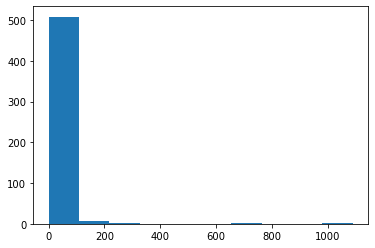

In [41]:
plt.hist((dataframe.area))

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

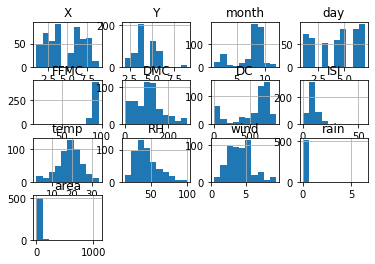

In [42]:
dataframe.hist()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

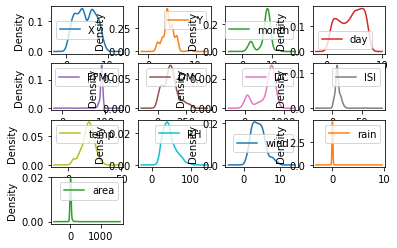

In [43]:
dataframe.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

X            AxesSubplot(0.125,0.71587;0.168478x0.16413)
Y         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
month     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
day       AxesSubplot(0.731522,0.71587;0.168478x0.16413)
FFMC        AxesSubplot(0.125,0.518913;0.168478x0.16413)
DMC      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
DC       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
ISI      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
temp        AxesSubplot(0.125,0.321957;0.168478x0.16413)
RH       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
wind     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
rain     AxesSubplot(0.731522,0.321957;0.168478x0.16413)
area           AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

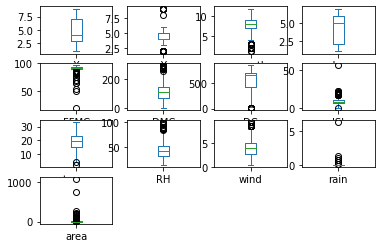

In [44]:
dataframe.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

[Text(0, 0, 'X'),
 Text(0, 1, 'Y'),
 Text(0, 2, 'month'),
 Text(0, 3, 'day'),
 Text(0, 4, 'FFMC'),
 Text(0, 5, 'DMC'),
 Text(0, 6, 'DC'),
 Text(0, 7, 'ISI'),
 Text(0, 8, 'temp'),
 Text(0, 9, 'RH'),
 Text(0, 10, 'wind'),
 Text(0, 11, 'rain'),
 Text(0, 12, 'area')]

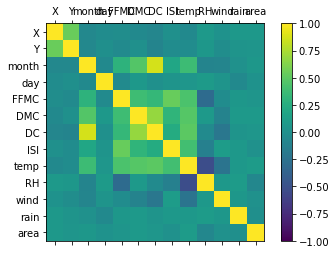

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframe.columns)
ax.set_yticklabels(dataframe.columns)

In [47]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.023975 (19.309939)
Ridge: 0.023975 (19.307816)
Lasso: 0.023297 (19.054901)
ElasticNet: 0.023187 (19.055855)
Bag_Re: 0.763105 (8.627086)
RandomForest: 0.853921 (7.804877)
ExtraTreesRegressor: 0.999897 (0.096441)
KNN: 0.273028 (15.508534)
CART: 0.999897 (0.096441)
SVM: 0.000503 (12.808832)


## --------------------------------------------------------------------------------------------------------------------------------

In [52]:
import pandas as pd
import numpy as npd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


#Load data
df = pd.read_csv('gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


<AxesSubplot:>

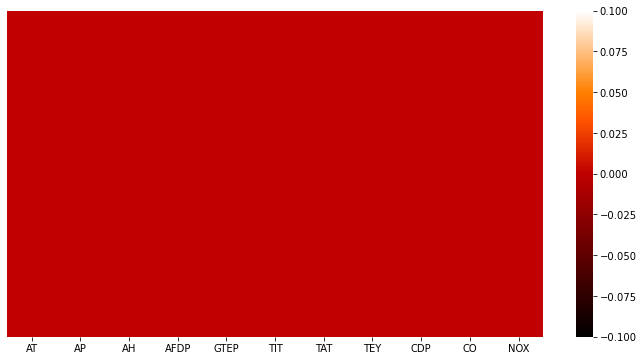

In [53]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isna(), cmap =('gist_heat'), yticklabels=False)

<AxesSubplot:title={'center':'Distplot for TEY'}, xlabel='TEY', ylabel='Density'>

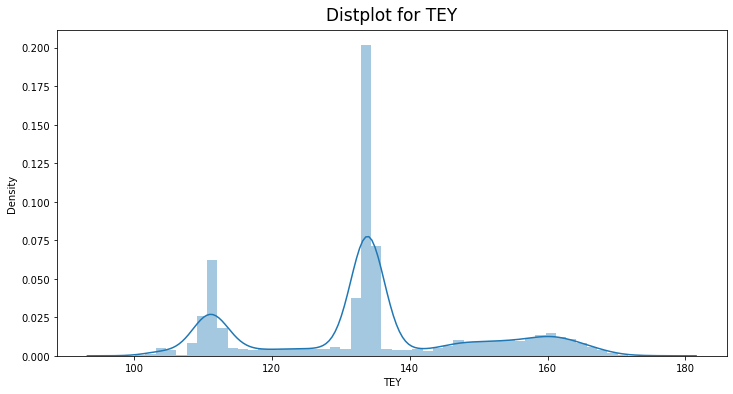

In [54]:
plt.title('Distplot for TEY', fontsize=17, y = 1.01)
sns.distplot(df['TEY'])

<AxesSubplot:title={'center':'Distplot for AT'}, xlabel='AT', ylabel='Density'>

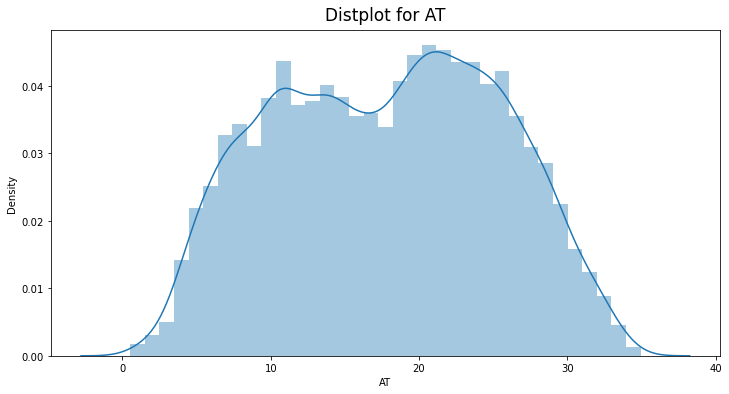

In [55]:
plt.title('Distplot for AT', fontsize=17, y = 1.01)
sns.distplot(df['AT'])

<AxesSubplot:title={'center':'Distplot for AP'}, xlabel='AP', ylabel='Density'>

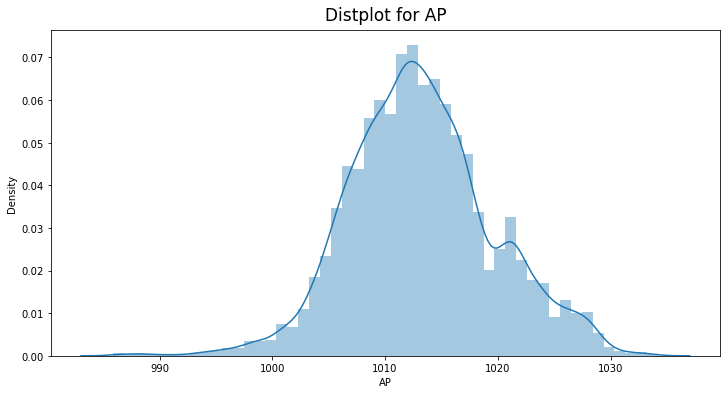

In [56]:
plt.title('Distplot for AP', fontsize=17, y = 1.01)
sns.distplot(df['AP'])

<AxesSubplot:title={'center':'Distplot for AH'}, xlabel='AH', ylabel='Density'>

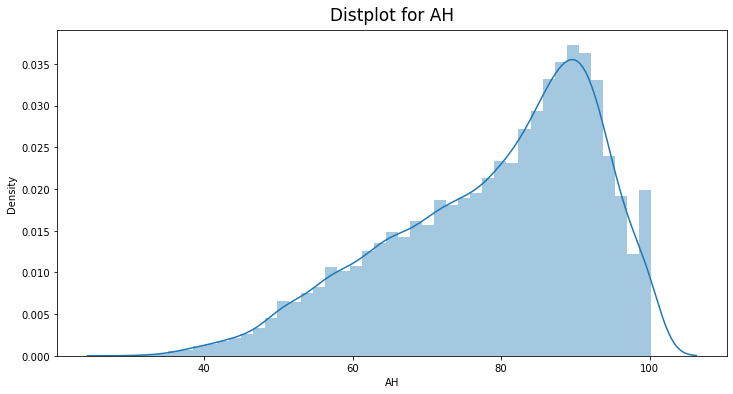

In [57]:
plt.title('Distplot for AH', fontsize=17, y = 1.01)
sns.distplot(df['AH'])

<AxesSubplot:title={'center':'Distplot for AFDP'}, xlabel='AFDP', ylabel='Density'>

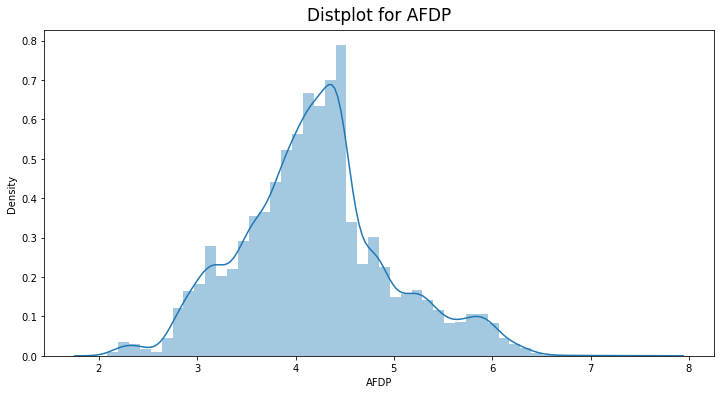

In [58]:
plt.title('Distplot for AFDP', fontsize=17, y = 1.01)
sns.distplot(df['AFDP'])

<AxesSubplot:title={'center':'Distplot for GTEP'}, xlabel='GTEP', ylabel='Density'>

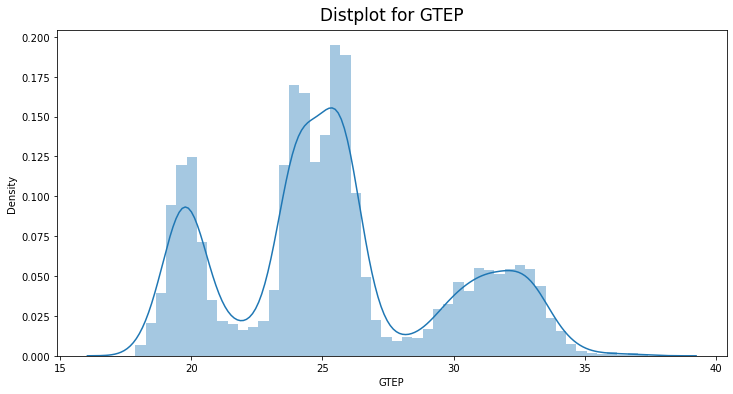

In [59]:
plt.title('Distplot for GTEP', fontsize=17, y = 1.01)
sns.distplot(df['GTEP'])

<AxesSubplot:title={'center':'Distplot for TIT'}, xlabel='TIT', ylabel='Density'>

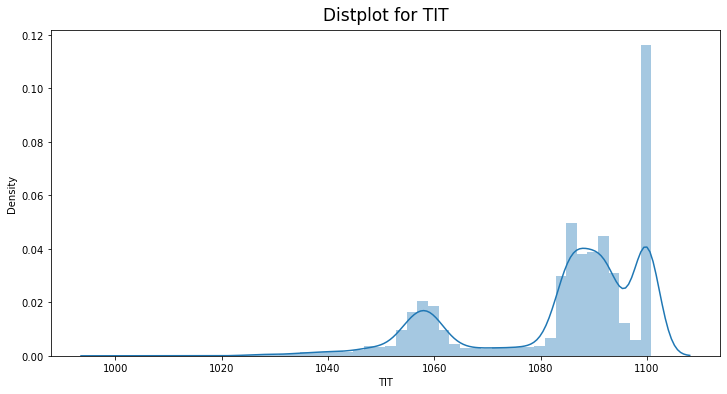

In [60]:
plt.title('Distplot for TIT', fontsize=17, y = 1.01)
sns.distplot(df['TIT'])

<AxesSubplot:title={'center':'Distplot for TAT'}, xlabel='TAT', ylabel='Density'>

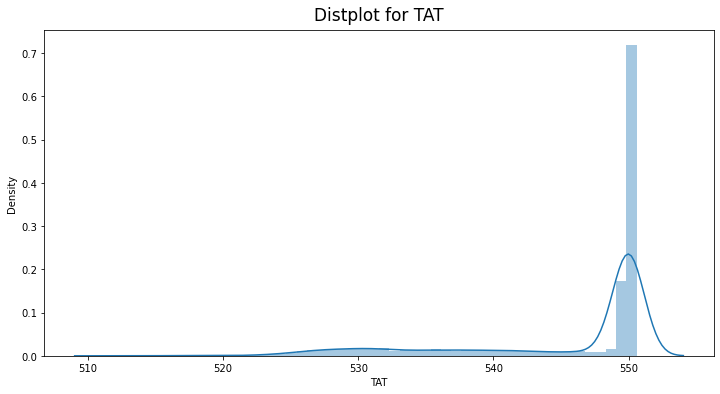

In [61]:
plt.title('Distplot for TAT', fontsize=17, y = 1.01)
sns.distplot(df['TAT'])

<AxesSubplot:title={'center':'Distplot for CDP'}, xlabel='CDP', ylabel='Density'>

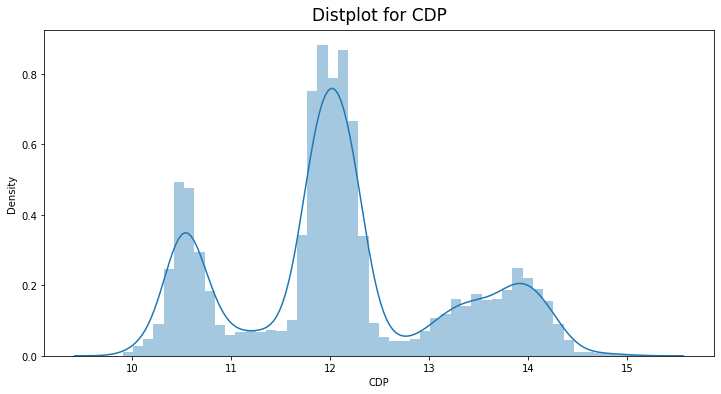

In [62]:
plt.title('Distplot for CDP', fontsize=17, y = 1.01)
sns.distplot(df['CDP'])

<AxesSubplot:title={'center':'Distplot for CO'}, xlabel='CO', ylabel='Density'>

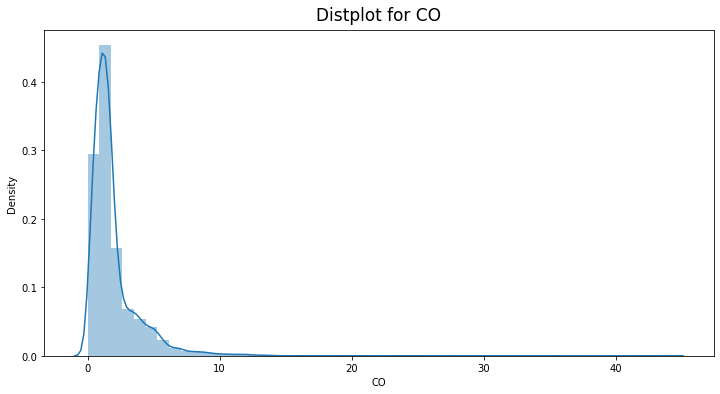

In [63]:
plt.title('Distplot for CO', fontsize=17, y = 1.01)
sns.distplot(df['CO'])

<AxesSubplot:title={'center':'Distplot for NOX'}, xlabel='NOX', ylabel='Density'>

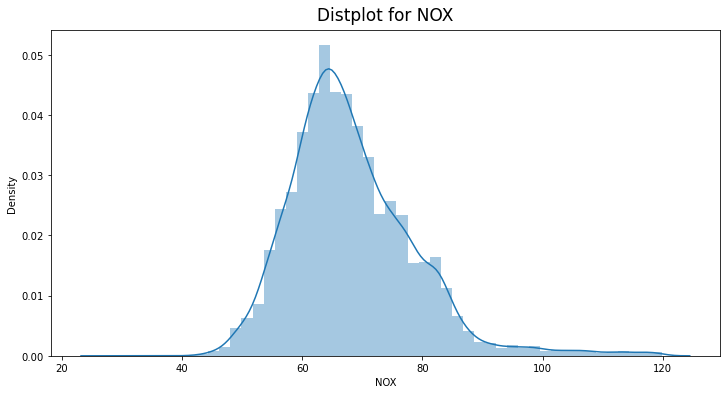

In [64]:
plt.title('Distplot for NOX', fontsize=17, y = 1.01)
sns.distplot(df['NOX'])

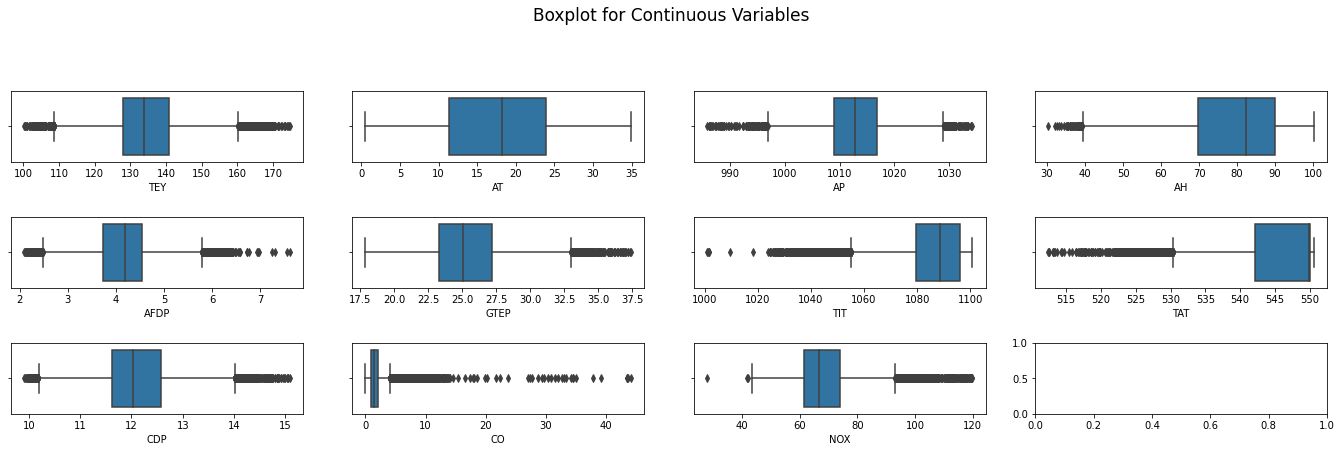

In [65]:
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.TEY, ax=ax[0,0])
sns.boxplot(df.AT, ax=ax[0,1])
sns.boxplot(df.AP, ax=ax[0,2])
sns.boxplot(df.AH, ax=ax[0,3])
sns.boxplot(df.AFDP, ax=ax[1,0])
sns.boxplot(df.GTEP, ax=ax[1,1])
sns.boxplot(df.TIT, ax=ax[1,2])
sns.boxplot(df.TAT, ax=ax[1,3])
sns.boxplot(df.CDP, ax=ax[2,0])
sns.boxplot(df.CO, ax=ax[2,1])
sns.boxplot(df.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

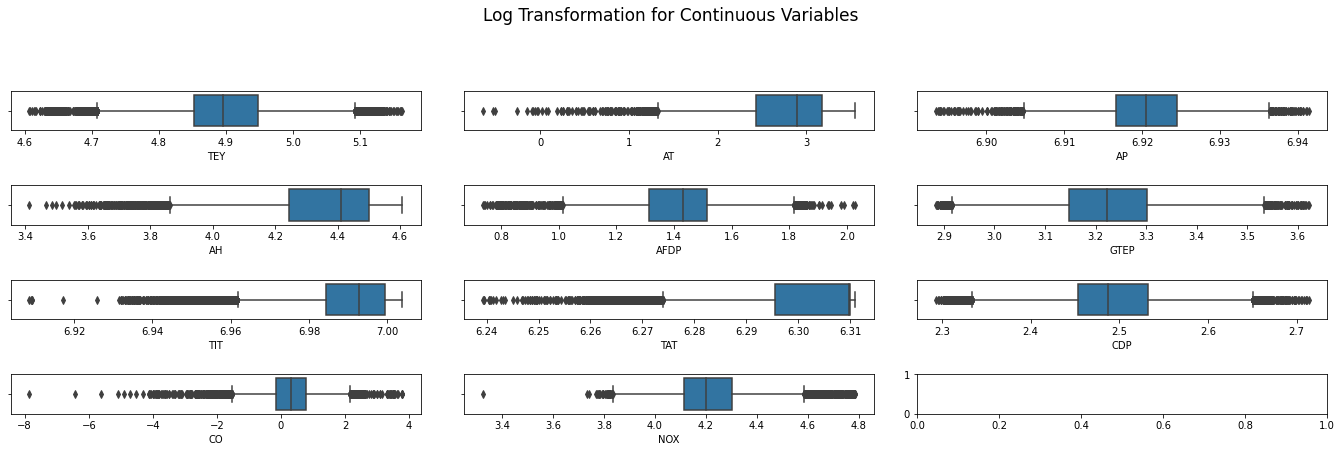

In [66]:
import numpy as np
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(df.TEY), ax=ax[0,0])
sns.boxplot(np.log(df.AT), ax=ax[0,1])
sns.boxplot(np.log(df.AP), ax=ax[0,2])
sns.boxplot(np.log(df.AH), ax=ax[1,0])
sns.boxplot(np.log(df.AFDP), ax=ax[1,1])
sns.boxplot(np.log(df.GTEP), ax=ax[1,2])
sns.boxplot(np.log(df.TIT), ax=ax[2,0])
sns.boxplot(np.log(df.TAT), ax=ax[2,1])
sns.boxplot(np.log(df.CDP), ax=ax[2,2])
sns.boxplot(np.log(df.CO), ax=ax[3,0])
sns.boxplot(np.log(df.NOX), ax=ax[3,1])
plt.suptitle("Log Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

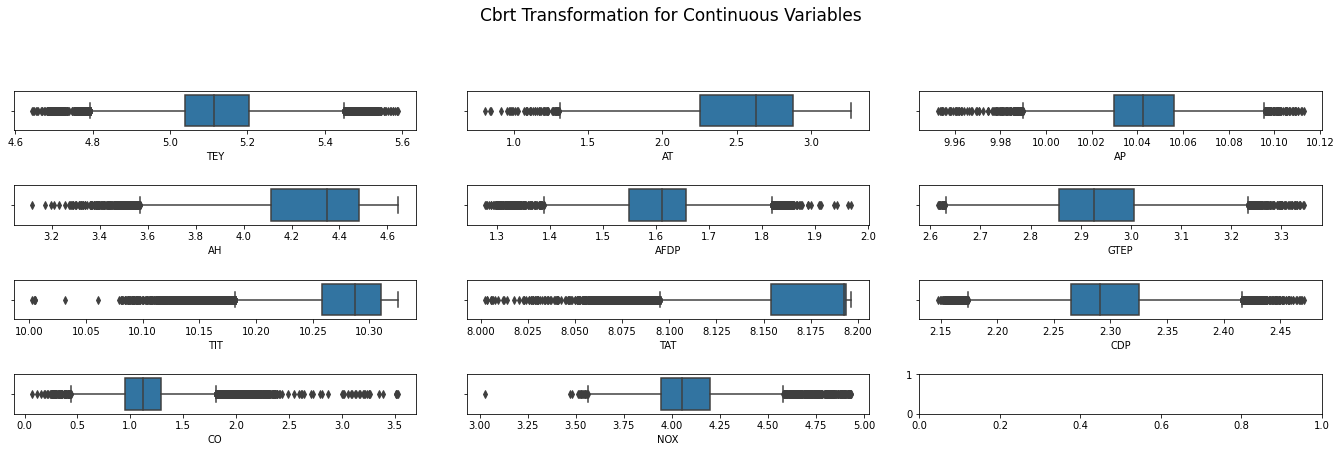

In [67]:
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.TEY), ax=ax[0,0])
sns.boxplot(np.cbrt(df.AT), ax=ax[0,1])
sns.boxplot(np.cbrt(df.AP), ax=ax[0,2])
sns.boxplot(np.cbrt(df.AH), ax=ax[1,0])
sns.boxplot(np.cbrt(df.AFDP), ax=ax[1,1])
sns.boxplot(np.cbrt(df.GTEP), ax=ax[1,2])
sns.boxplot(np.cbrt(df.TIT), ax=ax[2,0])
sns.boxplot(np.cbrt(df.TAT), ax=ax[2,1])
sns.boxplot(np.cbrt(df.CDP), ax=ax[2,2])
sns.boxplot(np.cbrt(df.CO), ax=ax[3,0])
sns.boxplot(np.cbrt(df.NOX), ax=ax[3,1])
plt.suptitle("Cbrt Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [68]:
corr = pd.DataFrame(data = df.corr().iloc[:,7], index=df.columns)
corr = corr.sort_values(by='TEY', ascending=False)
corr

,TEY
TEY,1.000000
CDP,0.988473
GTEP,0.977042
TIT,0.891587
AFDP,0.717995
AP,0.146939
NOX,-0.102631
AH,-0.110272
AT,-0.207495
CO,-0.541751


<AxesSubplot:title={'center':'Correlation plot between Target variables and independent variables'}, ylabel='TEY'>

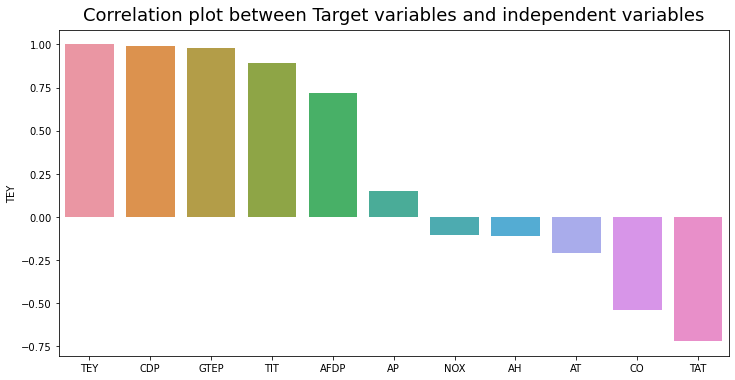

In [69]:
plt.title("Correlation plot between Target variables and independent variables", y=1.01, fontsize=18)
sns.barplot(x = corr.index, y = corr.TEY)

Text(0.5, 1.0, 'Correlation Map of variables')

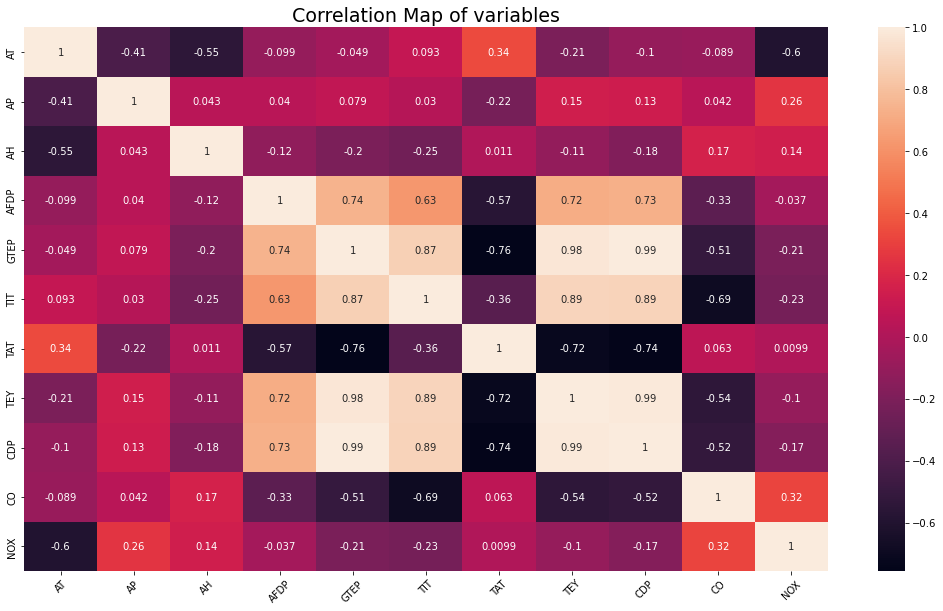

In [70]:
fig= plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=19)

In [71]:
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=e65bc30aacad38f88fd38ac9115d5e8f475b62caf0fb630894269f21822248b4
  Stored in directory: c:\users\anil\appdata\local\pip\cache\wheels\d8\2d\fc\c1699298a1241684a460b125835f7871ee8e3ab3afea9b5d6f
Successfully built ppscore


In [72]:
import ppscore as PPS
score = PPS.matrix(df)
score_s = score[score['y']=='TEY']
score_s.sort_values(by="ppscore", ascending=False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
84,TEY,TEY,1.000000,predict_itself,True,None,0.000000,1.000000,None
95,CDP,TEY,0.872285,regression,True,mean absolute error,11.172076,1.426840,DecisionTreeRegressor()
51,GTEP,TEY,0.832336,regression,True,mean absolute error,11.172076,1.873154,DecisionTreeRegressor()
62,TIT,TEY,0.766040,regression,True,mean absolute error,11.172076,2.613821,DecisionTreeRegressor()
73,TAT,TEY,0.226050,regression,True,mean absolute error,11.172076,8.646631,DecisionTreeRegressor()
40,AFDP,TEY,0.152509,regression,True,mean absolute error,11.172076,9.468234,DecisionTreeRegressor()
106,CO,TEY,0.055869,regression,True,mean absolute error,11.172076,10.547906,DecisionTreeRegressor()
7,AT,TEY,0.000000,regression,True,mean absolute error,11.172076,16.007470,DecisionTreeRegressor()
18,AP,TEY,0.000000,regression,True,mean absolute error,11.172076,12.475617,DecisionTreeRegressor()
29,AH,TEY,0.000000,regression,True,mean absolute error,11.172076,16.950976,DecisionTreeRegressor()


Text(0.5, 1.01, 'PPScore of each feature with Target variable')

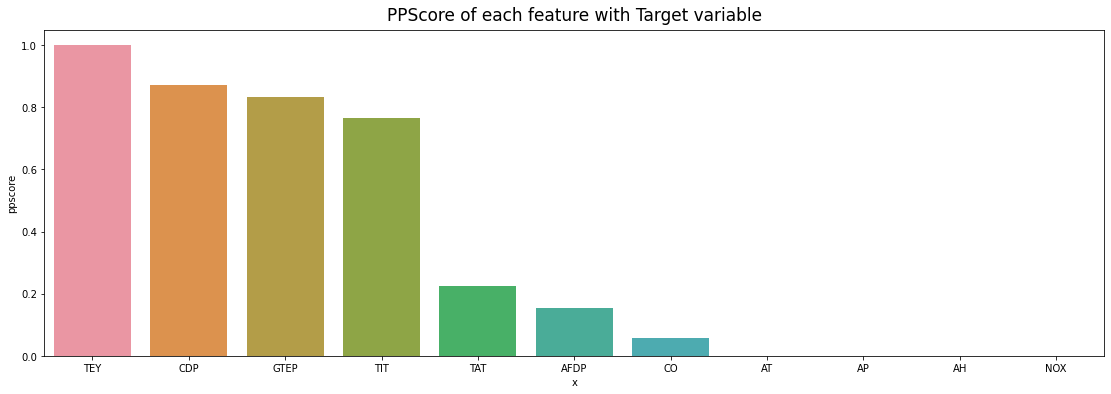

In [73]:
plt.rcParams['figure.figsize']=(19,6)
sns.barplot(x='x', y='ppscore', data=score_s.sort_values(by='ppscore', ascending=False))
plt.title("PPScore of each feature with Target variable", fontsize=17, y=1.01)

In [74]:
#check for outliers
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.001)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:11])
outliers = data1[data1['anamoly']==-1]

In [75]:
outliers

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,anamoly
261,5.66020,1018.30,86.968,3.8404,21.079,1028.5,523.86,112.02,10.963,43.4280,99.237,-1
553,3.55320,1027.30,90.871,4.2162,21.464,1041.2,531.68,117.76,10.984,8.8254,106.840,-1
763,1.81300,1007.20,74.980,3.6967,19.958,1026.4,528.18,111.72,10.553,12.0900,114.940,-1
764,1.49880,1006.30,76.734,3.7063,20.041,1027.6,528.79,112.28,10.585,11.6520,112.830,-1
765,0.97877,1005.70,78.978,3.7379,20.084,1027.9,528.52,112.71,10.628,11.6910,108.880,-1
993,4.36570,1021.60,85.528,3.9574,20.263,1025.6,525.72,111.35,10.652,12.7860,112.270,-1
6896,17.13200,1010.80,80.503,2.2148,18.484,1034.1,539.98,102.07,10.182,11.5150,110.760,-1
7019,7.02760,997.23,97.761,2.0992,19.227,1037.2,538.53,109.63,10.338,11.0440,105.060,-1
7470,7.04730,1019.60,96.885,2.4558,19.501,1032.0,532.32,109.21,10.567,11.3740,112.230,-1
9920,15.17900,1017.60,71.630,2.7816,18.435,1027.8,533.45,103.64,10.143,12.1440,113.800,-1


In [76]:
df = df.drop(outliers.index)
df.shape

(15023, 11)

In [77]:
df = df.reset_index()
df = df.drop('index', axis = 1)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15018,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15019,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15020,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15021,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [78]:
df = df.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)
df.shape

(15023, 7)

In [79]:
norm = MinMaxScaler()
std = StandardScaler()

df_norm = pd.DataFrame(norm.fit_transform(df), columns=df.columns)           
df_std = pd.DataFrame(std.fit_transform(df), columns=df.columns)

In [80]:
temp = df_std.sample(frac=1)          
temp_s = df_std.sample(frac=0.1)

In [81]:
temp_s

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
4934,0.182880,0.052452,0.483367,0.574102,-0.028177,0.065288,-0.569382
10153,-0.794022,-0.259413,0.258121,0.576650,-0.026280,-0.120646,-0.241975
14526,-0.183294,-0.186301,0.270296,0.613602,0.120417,-0.106134,-0.137954
3986,0.050336,0.170630,0.574683,0.579199,0.004071,0.243060,-0.366177
9191,0.314502,-0.362489,0.075489,0.591941,-0.034500,-0.231300,-0.494176
...,...,...,...,...,...,...,...
2905,-0.010737,0.128680,0.568596,0.574102,-0.024383,0.074358,-0.245331
2634,-0.658714,-1.420575,-1.781272,0.548618,-1.583039,-1.492026,1.550297
7499,-1.689844,-0.375912,0.026787,0.551166,-0.010472,-0.269394,-0.094472
11817,0.373469,1.102388,0.958211,-0.624922,0.627533,1.091102,-0.706339


In [82]:
x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x

,AFDP,GTEP,TIT,TAT,CDP,CO
4934,0.182880,0.052452,0.483367,0.574102,0.065288,-0.569382
10153,-0.794022,-0.259413,0.258121,0.576650,-0.120646,-0.241975
14526,-0.183294,-0.186301,0.270296,0.613602,-0.106134,-0.137954
3986,0.050336,0.170630,0.574683,0.579199,0.243060,-0.366177
9191,0.314502,-0.362489,0.075489,0.591941,-0.231300,-0.494176
...,...,...,...,...,...,...
2905,-0.010737,0.128680,0.568596,0.574102,0.074358,-0.245331
2634,-0.658714,-1.420575,-1.781272,0.548618,-1.492026,1.550297
7499,-1.689844,-0.375912,0.026787,0.551166,-0.269394,-0.094472
11817,0.373469,1.102388,0.958211,-0.624922,1.091102,-0.706339


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1126, 6), (376, 6), (1126,), (376,))

In [84]:
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')

[]

In [85]:
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [86]:
model1 = create_model_two_hidden_layers()

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 6)                 36        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [87]:
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [88]:
model2 = create_model_three_hidden_layers()

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________


In [89]:
%%time
epochs=500
batch_size=50

print("Here is the summary of this model:")
model2.summary()

with tf.device('/GPU:0'):
  model2.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

Here is the summary of this model:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________
Wall time: 32.3

In [90]:
model2.predict(x_test[:10])

1/1 [==============================] - 0s 179ms/step


array([[-0.02898526],
       [ 0.05992518],
       [-0.02006032],
       [-0.00899053],
       [ 0.00964572],
       [-0.01238781],
       [-0.01613162],
       [-0.05539104],
       [-0.6026149 ],
       [-1.441257  ]], dtype=float32)

In [91]:
y_test[:10]

12722   -0.025016
4408     0.036319
10418   -0.043353
5130    -0.026280
4849     0.033157
2278     0.033790
477     -0.035133
997     -0.031339
9704    -0.678197
12381   -1.418637
Name: TEY, dtype: float64

In [92]:
loss, mae, mse, mape = model2.evaluate(x_train, y_train)

36/36 [==============================] - 1s 2ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0457 - mape: 78.7658


In [93]:
loss, mae, mse, mape = model2.evaluate(x_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0627 - mape: 78.9180


In [94]:
# We got pretty good results for this model.
#Train and test errors are also quiet similar, which means our model is not overfitted or underfitted.